In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('./Downloads/melb_data.csv/melb_data.csv')
#df['Date'] = pd.to_datetime(df['Date'])
pd.set_option('display.max_columns', 21)
#df.loc[:, ['Price', 'Regionname', 'BuildingArea', 'Suburb']].head(20)
df.head(4)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0


In [2]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

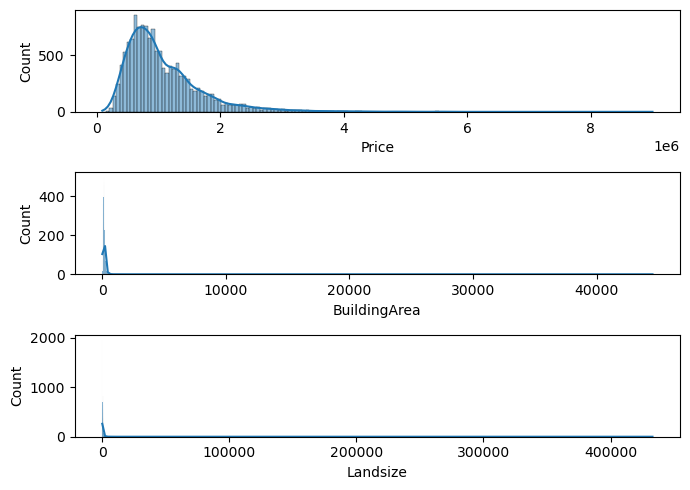

In [90]:
from matplotlib.ticker import MaxNLocator
#plt.hist(df['Price'], bins=50)
#plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=15))  # Increase the number of ticks to 15
#plt.xlabel('Price')
fig, axe = plt.subplots(3,1, figsize=(7,5))
sns.histplot(data=df, x='Price', kde=True, ax=axe[0])
sns.histplot(data=df, x='BuildingArea', kde=True, ax=axe[1])
sns.histplot(data=df, x='Landsize', kde=True, ax=axe[2])

#sns.boxplot(data=df['Price'], ax=axe[1,0])
#sns.boxplot(data=df['BuildingArea'], ax=axe[1,1])

plt.tight_layout()
plt.show()


In [3]:
df[df['BuildingArea']>1000].count() ## 7 entries
df[df['Price']>4000000].count() ## 55 entries
df[df['Landsize']>3000].count() ## 100 entries

Suburb           135
Address          135
Rooms            135
Type             135
Price            135
Method           135
SellerG          135
Date             135
Distance         135
Postcode         135
Bedroom2         135
Bathroom         135
Car              132
Landsize         135
BuildingArea      61
YearBuilt         82
CouncilArea      122
Lattitude        135
Longtitude       135
Regionname       135
Propertycount    135
dtype: int64

In [3]:
###***********Lets remove ouliers********************
df = df[df['Price'] <= 4000000] ## keeps only less than 4mil,  removes the entries greater than 4 mil.
df = df[df['BuildingArea']<=700] ## keeps only that are less than 700 m2
df = df[df['Landsize']<=2000] ## lets keep landsize that are only less than 2000 m2

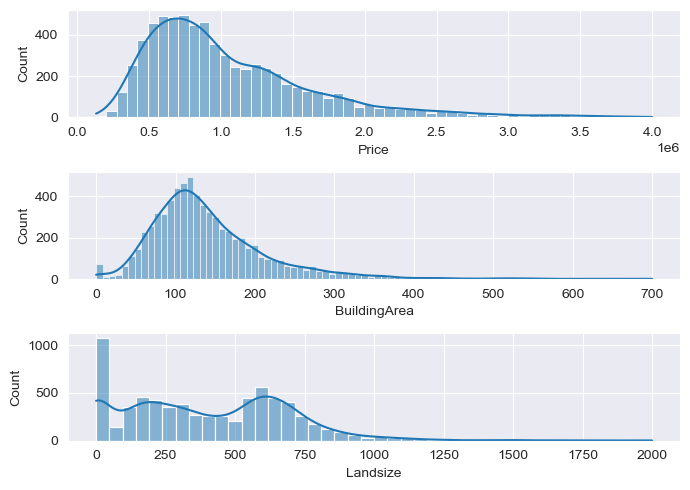

In [5]:
sns.set_style("darkgrid")
fig, axe = plt.subplots(3,1, figsize=(7,5))
sns.histplot(data=df, x='Price', kde=True, ax=axe[0])
sns.histplot(data=df, x='BuildingArea', kde=True, ax=axe[1])
sns.histplot(data=df, x='Landsize', kde=True, ax=axe[2])

#sns.boxplot(data=df['Price'], ax=axe[1,0])
#sns.boxplot(data=df['BuildingArea'], ax=axe[1,1])

plt.tight_layout()
plt.show()


In [ ]:
from scipy import stats

#Remove outliers using zscore
"""z = np.abs(stats.zscore(df['Landsize']))
threshold_z = 2

outlier_indices = np.where(z > threshold_z)[0]
df = df.drop(outlier_indices)
df['Landsize'].describe()"""


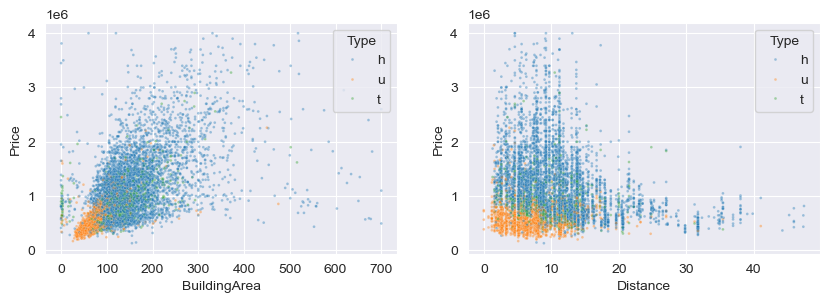

In [119]:
#plt.scatter(df['BuildingArea'].where(df['BuildingArea']<400), df['Price'], s=3, alpha=0.5) 
fig, axe = plt.subplots(1,2, figsize=(10,3))
sns.scatterplot(data=df, x='BuildingArea', y='Price',hue='Type', s=4, alpha=0.4, ax=axe[0])
sns.scatterplot(data=df, x='Distance', y='Price',s=4, hue='Type', alpha=0.4, ax=axe[1])

plt.show()

In [7]:
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df['Date'].info()

<class 'pandas.core.series.Series'>
Index: 6969 entries, 1 to 13579
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
6969 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 108.9 KB


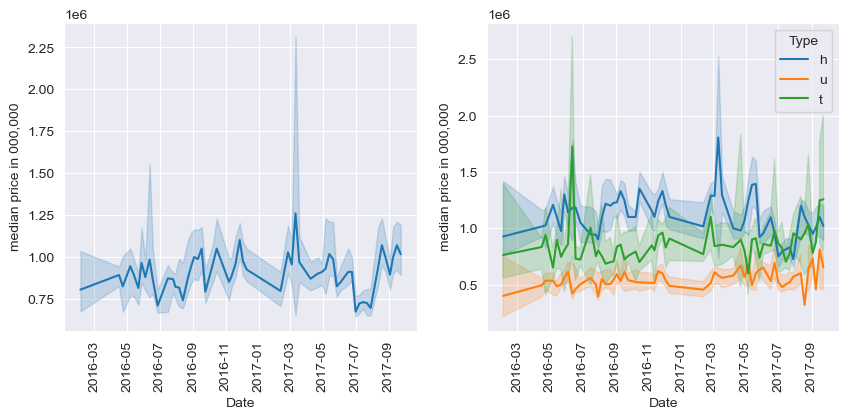

In [121]:
fig, axe = plt.subplots(1,2, figsize=(10,4))
sns.lineplot(data=df, x='Date', y='Price', estimator='median',  ax=axe[0])
sns.lineplot(data=df, x='Date', y='Price', hue='Type', estimator='median', ax=axe[1])

axe[0].set_ylabel('median price in 000,000')
axe[1].set_ylabel('median price in 000,000')
axe[0].tick_params(axis='x', rotation=90)
axe[1].tick_params(axis='x', rotation=90)

plt.show()

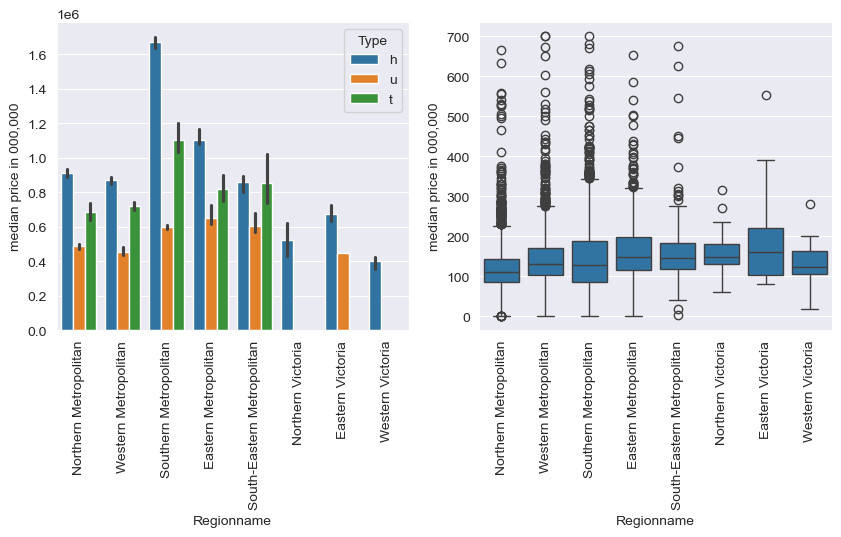

In [123]:
fig, axe = plt.subplots(1,2,figsize=(10,4))
sns.barplot(data=df, x='Regionname', y='Price', hue='Type', estimator='median', ax=axe[0])
sns.boxplot(data=df[df['BuildingArea']<1000], x='Regionname', y='BuildingArea',ax=axe[1])
axe[0].set_ylabel('median price in 000,000')
axe[1].set_ylabel('median price in 000,000')
axe[0].tick_params(axis='x', rotation=90)
axe[1].tick_params(axis='x', rotation=90)
plt.show()

In [9]:
#Lets add new column for price/m2 for price analysis. 
df['price/m2'] = df['Price']/df['BuildingArea']

In [11]:
df.head(4)
df['price/m2'].describe()

count    6969.000000
mean             inf
std              NaN
min       707.142857
25%      5674.603175
50%      7428.571429
75%      9444.444444
max              inf
Name: price/m2, dtype: float64

count    6.952000e+03
mean     1.174299e+04
std      6.170889e+04
min      7.071429e+02
25%      5.667744e+03
50%      7.419622e+03
75%      9.431639e+03
max      3.812000e+06
Name: price/m2, dtype: float64

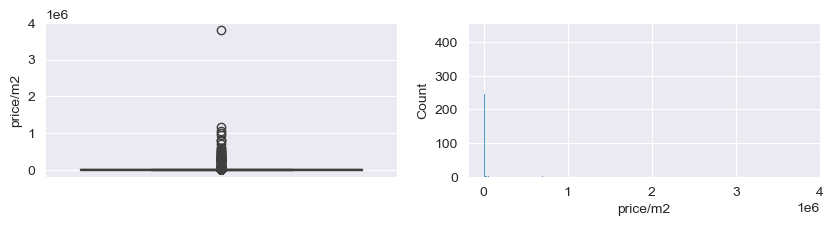

In [23]:
import numpy as np
#************************REPLACING LARGER OUTLIERS WITH NaN***********************
df.replace([np.inf, -np.inf], np.nan, inplace=True) #replacing infinite value
fig, axe = plt.subplots(1,2,figsize=(10,2))
sns.boxplot(data=df['price/m2'], ax=axe[0])
sns.histplot(data=df['price/m2'], ax=axe[1])
df['price/m2'].describe()  

*********Infinite values are replaced but still there are very large values which are not practical. Its impossible to be millions per meter-square in practical. All these large values and infinite are created due to division with un-expected numbers. In next step Check how many of those are and replace them with NaN

100

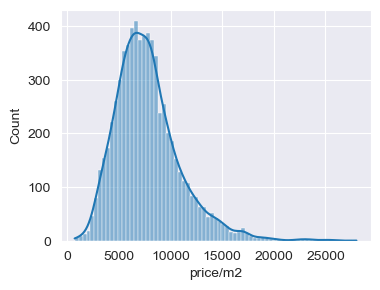

In [25]:
##Lets Check the distribution at 30000 /m2 
sns.set_style("darkgrid")
fig, axe = plt.subplots(figsize=(4,3))
sns.histplot(data=df[df['price/m2']<30000]['price/m2'], kde=True)
df[df['price/m2']>30000]['price/m2'].count() ##There are about 100 entries (rows) which are greater than 30,000. 100 rows can be converted to  NaN

In [27]:
##********BE CAREFULL IN THIS STEP !!!!!!!!!!!!!!
df['price/m2'] = df['price/m2'].mask(df['price/m2']>30000, None) # replacing large outliers with NaN OR df.loc[df['col1'] > 10000, 'col1'] = None

In [29]:
df['price/m2'].describe() ## Now looks realistic data. Further analysis can be done with price/m2

count     6852.000000
mean      7782.638577
std       3162.893595
min        707.142857
25%       5639.574468
50%       7369.181625
75%       9333.333333
max      28000.000000
Name: price/m2, dtype: float64

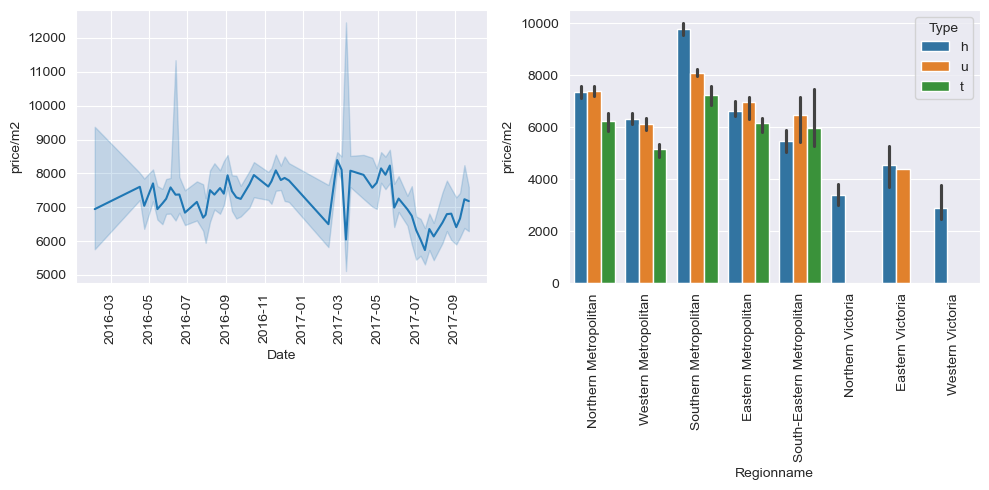

In [31]:
sns.set_style("darkgrid")
fig, axe = plt.subplots(1,2, figsize=(10,5))
sns.lineplot(data=df, x='Date', y='price/m2', estimator='median', ax=axe[0])
sns.barplot(data=df, x='Regionname', y='price/m2', hue='Type',estimator='median', ax=axe[1])

axe[0].tick_params(axis='x', rotation=90)
axe[1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

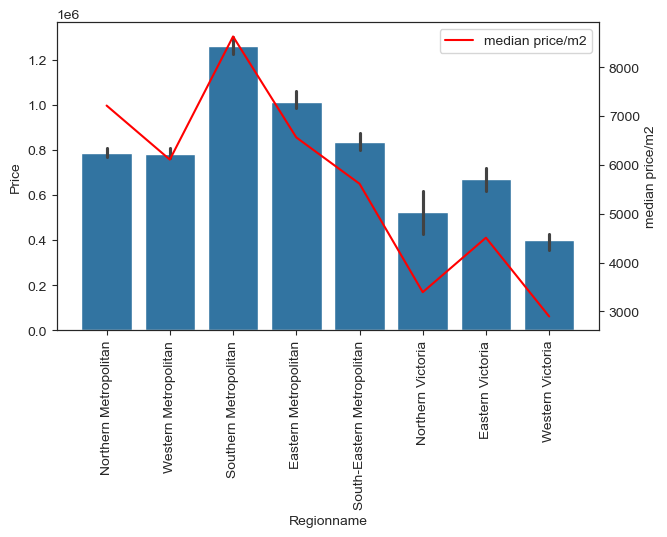

In [111]:
sns.set_style("ticks")
fig, axe = plt.subplots(figsize=(7,4))

sns.barplot(data=df, x='Regionname', y='Price', estimator='median', ax=axe )

# Create a second y-axis (ax2) that shares the same x-axis
ax2 = axe.twinx()
# Plot a lineplot on the second y-axis (ax2)
sns.lineplot(data = df, y='price/m2', x='Regionname', estimator='median', ax=ax2, color='red',  label='median price/m2', err_style=None)
ax2.set_ylabel('median price/m2')
axe.tick_params(axis='x', rotation=90)
plt.show()

<Axes: ylabel='Suburb'>

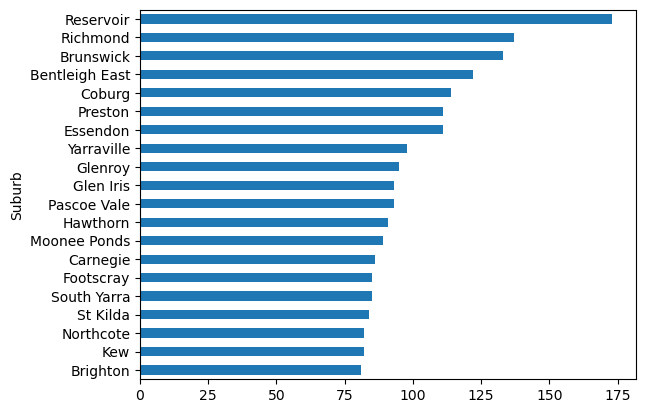

In [54]:
df['Suburb'].nunique()  #314 unique Suburbs available
df['Suburb'].value_counts().nlargest(20).sort_values(ascending=True).plot(kind='barh')


In [33]:
### YearBult is in float type. float-->int-->str-->add dd_mm-->date-time
yr = df['YearBuilt'].astype('Int64')
styr = yr.astype(str) + '-01-01'
df['YearBuilt'] = pd.to_datetime(styr, errors='coerce')
df.head(4)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,price/m2
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900-01-01,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,13101.265823
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900-01-01,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,9766.666667
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,...,2.0,120.0,142.0,2014-01-01,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,11267.605634
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,2016-05-07,2.5,3067.0,...,0.0,245.0,210.0,1910-01-01,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0,8933.333333


<Axes: xlabel='Rooms', ylabel='price/m2'>

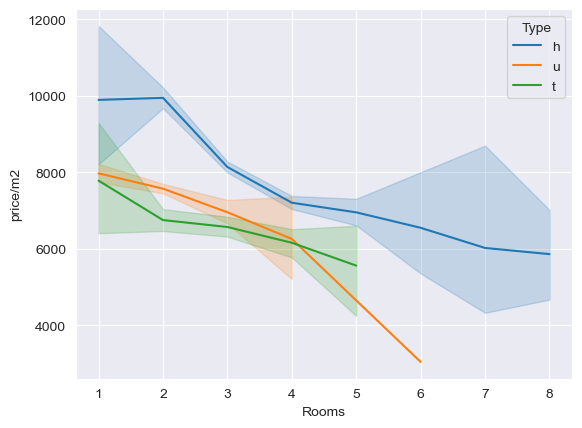

In [161]:
sns.lineplot(data=df, x='Rooms', y='price/m2',hue='Type')

C:\Users\rupak\AppData\Local\Temp\ipykernel_11132\4111511255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df.sort_values(by='Car', inplace=True)
C:\Users\rupak\AppData\Local\Temp\ipykernel_11132\4111511255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['Car'] = modi_df['Car'].astype(str)


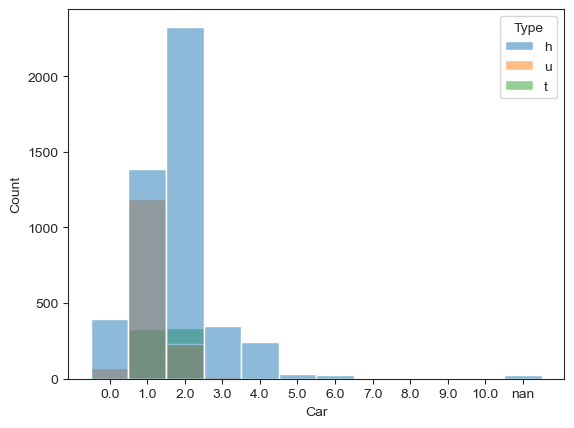

In [227]:
sns.set_style('ticks')
modi_df = df[['Car', 'Type']]
modi_df.sort_values(by='Car', inplace=True)
modi_df['Car'] = modi_df['Car'].astype(str)

sns.histplot(data= modi_df, x='Car', hue='Type')
plt.show()

<Axes: xlabel='YearBuilt', ylabel='price/m2'>

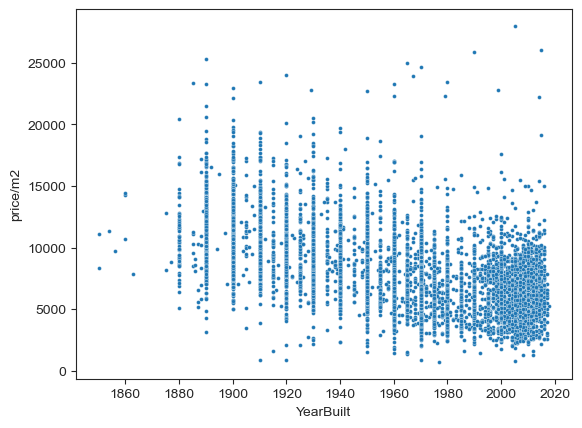

In [241]:
sns.scatterplot(data=df, x='YearBuilt', y='price/m2', s=8)

<Axes: xlabel='Price', ylabel='CouncilArea'>

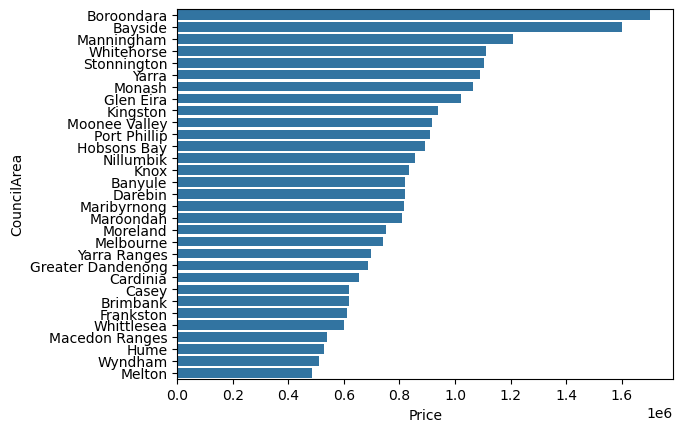

In [67]:
gdf_c = df.groupby('CouncilArea')['Price'].median()
ca_df = gdf_c.reset_index().sort_values(by='Price', ascending=False)
sns.barplot(data=ca_df, y='CouncilArea', x='Price', orient='h' )


********IMPLEMENTING LINEAR-MODEL TO PREDICT PRICE***************

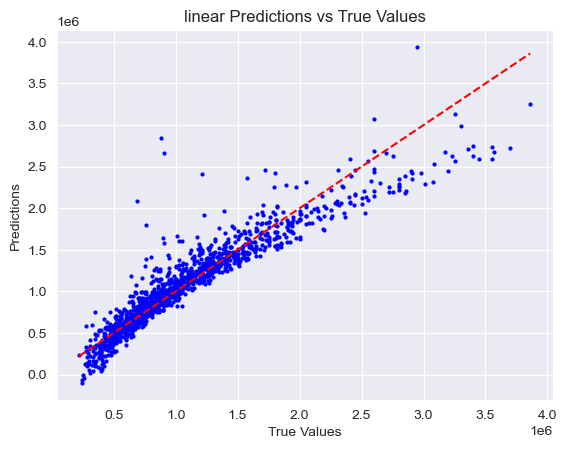

In [65]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'target' is the column you're trying to predict
le = LabelEncoder()
df['Suburb'] = le.fit_transform(df['Suburb'])
df['CouncilArea'] = le.fit_transform(df['CouncilArea'])
df['Regionname'] = le.fit_transform(df['Regionname'])
df['Type'] = le.fit_transform(df['Type'])
#df['Date'] = (df['Date'] - df['Date'].min()).dt.total_seconds()
df['YearBuilt'] = pd.to_datetime(df['YearBuilt'])
df['YearBuilt'] = (df['YearBuilt'] - df['YearBuilt'].min()).dt.total_seconds()
df.dropna(axis=0, how='any', inplace=True)

# Split the DataFrame into features (X) and target (y)
X = df.drop(columns=['Price', 'Address', 'Method','SellerG','Postcode', 'Propertycount','Date']) ## df without price & other unnecesary columns
y = df['Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

li_reg = linear_model.LinearRegression()
# Train the model
li_reg.fit(X_train, y_train)

# Make predictions
y_pred = li_reg.predict(X_test)

# Optionally, visualize the results (if you want to plot)
plt.scatter(y_test, y_pred, color='blue', s=4)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('linear Predictions vs True Values')
plt.show()